## EDA ON THE REVIEW TEXT

We have conducted an in-depth review surrounding the background of the Amazon dataset, and this time the ``review_text`` itself is going to be taken a further look. To aid in our pre-processing, certain columns will be added to understand certain instances the sentences have. Those include the counts of:
1. Word
2. Characters (with spaces)
3. Stopwords
4. Punctuations
5. Uppercase characters

After the columns are added, necessary ``summary statistics`` will be conducted to get an idea on how the pre-processing will take place.

In [1]:
#LIBRARIES 
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer 
import string
import re
import warnings
warnings.simplefilter("ignore")

In [2]:
file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\data and pickle files\amazon_reviews_2019.csv"
update_file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\data and pickle files\updated_data.csv"
# Try loading the CSV file with a different encoding

try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    review_data = pd.read_csv(update_file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    #REMOVE MAX
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
except Exception as e:
    print("Error loading file:", e)

In [3]:
#WORD COUNT
review_data['total words'] = review_data['review_text'].apply(lambda i: len(str(i).split(" ")))

#CHARACTER COUNT
review_data['total characters'] = review_data['review_text'].str.len() #spaces are included

#STOPWORDS COUNT
sw = set(stopwords.words('english'))
review_data['total stopwords'] = review_data['review_text'].str.split().apply(lambda i: len(set(i) & sw))

#PUNCTUATION AND SPECIAL CHARA COUNT
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
review_data['total punctuations'] = review_data.review_text.apply(lambda p: count_p(p, string.punctuation))

#UPPERCASE CHARA COUNT
review_data['total uppercases'] = review_data['review_text'].str.findall(r'[A-Z]').str.len() #findall - finds all

In [4]:
review_data.head() #UPDATED 

,Unnamed: 0,review_rating,review_text,verified_purchase,total words,total characters,total stopwords,total punctuations,total uppercases
0,0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,2,4,Excellent,True,1,9,0,0,1
3,3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,4,5,Does what is says it does,False,6,25,4,0,1


In [5]:
#DROPPING UNWANTED COLUMN
review_data.drop(['Unnamed: 0'], axis=1, inplace=True)

### Summary Statistics

In [6]:
review_data.describe()

,review_rating,total words,total characters,total stopwords,total punctuations,total uppercases
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.198487,177.890570,9.257276,4.434226,3.710128
std,1.123083,35.251879,189.818467,8.537092,5.177685,4.209264
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,41.000000,2.000000,1.000000,1.000000
50%,5.000000,21.000000,114.500000,7.000000,3.000000,2.000000
75%,5.000000,50.000000,268.750000,15.000000,7.000000,5.000000
max,5.000000,287.000000,1624.000000,48.000000,42.000000,54.000000


> Readings
1. The mean characters within the entire dataset happens to be at 177, averaging at about 33 words per review.
2. On average, there are about 9 stop words, and within the sentences there are about 4 punctuations.
3. As for the uppercase letters, from the mean value it is safe to assume that most of the reviews utlized their uppercases as Sentence Case.

In [7]:
review_data.groupby("verified_purchase").describe().T

verified_purchase               False        True 
review_rating      count   900.000000   818.000000
                   mean      4.315556     4.580685
                   std       1.187805     1.030249
                   min       1.000000     1.000000
                   25%       4.000000     5.000000
                   50%       5.000000     5.000000
                   75%       5.000000     5.000000
                   max       5.000000     5.000000
total words        count   900.000000   818.000000
                   mean     50.271111    14.414425
                   std      36.854098    21.041211
                   min       1.000000     1.000000
                   25%      23.000000     3.000000
                   50%      48.000000     8.000000
                   75%      63.000000    17.000000
                   max     282.000000   287.000000
total characters   count   900.000000   818.000000
                   mean    268.920000    77.735941
                   std     199.070130   113.775095
                   min       4.000000     2.000000
                   25%     126.000000    18.000000
                   50%     247.000000    44.500000
                   75%     335.000000    90.750000
                   max    1541.000000  1624.000000
total stopwords    count   900.000000   818.000000
                   mean     13.838889     4.216381
                   std       8.256163     5.440307
                   min       0.000000     0.000000
                   25%       8.000000     0.000000
                   50%      14.000000     2.000000
                   75%      19.000000     6.000000
                   max      48.000000    44.000000
total punctuations count   900.000000   818.000000
                   mean      6.837778     1.789731
                   std       5.607709     2.893422
                   min       0.000000     0.000000
                   25%       3.000000     0.000000
                   50%       6.000000     1.000000
                   75%       9.000000     3.000000
                   max      42.000000    28.000000
total uppercases   count   900.000000   818.000000
                   mean      5.143333     2.133252
                   std       4.467720     3.243386
                   min       0.000000     0.000000
                   25%       2.000000     1.000000
                   50%       4.000000     1.000000
                   75%       7.000000     2.000000
                   max      54.000000    52.000000

> Findings
1. Review Length: False reviews are longer, averaging 50 words and 268 characters, while True reviews average 14 words and 77 characters.
2. Stopwords Usage: False reviews contain more stopwords, indicating possible filler content.
3. Punctuation and Case: False reviews have more punctuations and uppercase characters, suggesting they use longer, more complex sentences compared to True reviews.


In [8]:
colors = ["#1f77b4", "#ff7f0e"]

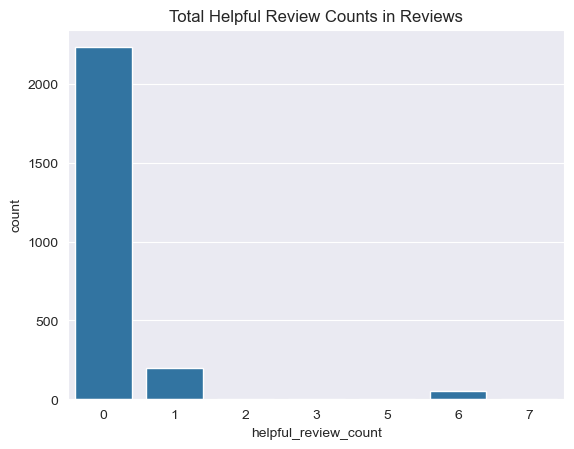

In [9]:
#COUNTPLOT ON TOTAL HELPFUL_REVIEW_COUNTS
sns.countplot(x ='helpful_review_count', 
              data = data).set_title("Total Helpful Review Counts in Reviews")
plt.show()

> In a typical scenario, the helpful_review_count column helps determine which reviews assist users in making purchase decisions. However, in this dataset, most reviews show a count of zero, with only a few having minimal values. This lack of useful data could skew our ability to identify fake versus genuine reviews. To mitigate bias in our model building, we will exclude this column from our analysis.

Text(0.5, 1.0, 'Count of Product Categories')

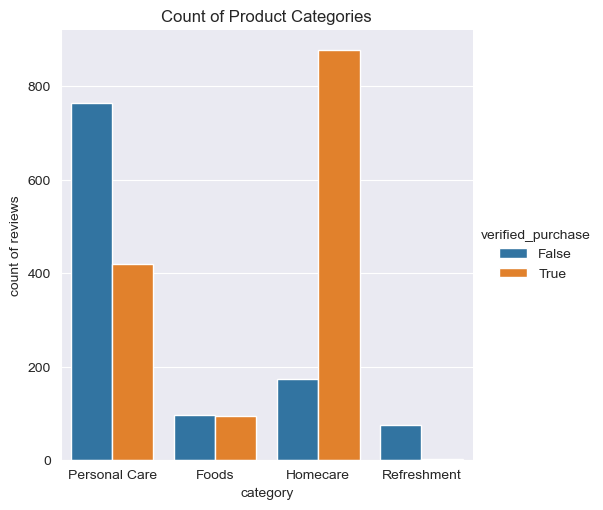

In [10]:
sns.catplot(x='category', kind='count', hue='verified_purchase', palette=colors, data=data)
plt.xlabel("category")
plt.ylabel("count of reviews")
plt.title("Count of Product Categories")

Text(0.5, 1.0, 'Count of Product Sub Categories')

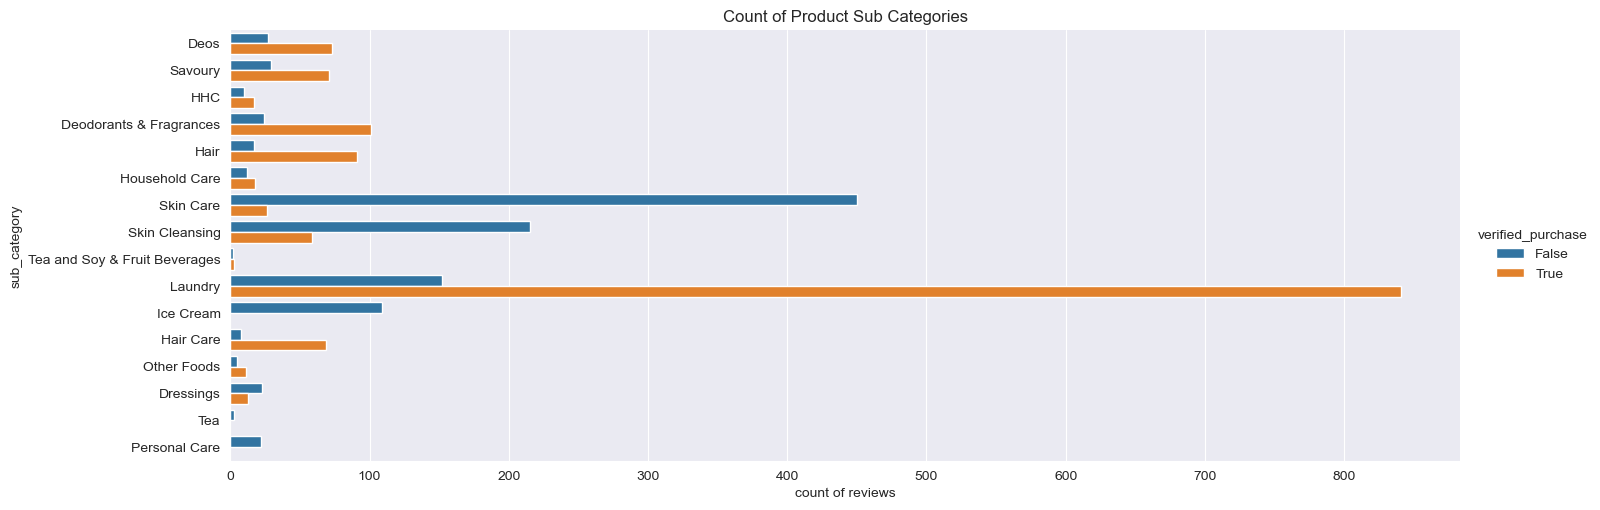

In [11]:
sns.catplot(y ='sub_category',kind="count", hue = "verified_purchase", data=data, palette=colors, height=5, aspect=3)
plt.ylabel("sub_category")
plt.xlabel("count of reviews")
plt.title("Count of Product Sub Categories")

> Looking further into the categories, we can see that the sub-categories with more unverified reviews are under skin care, skin cleansing, personal care and dressings. Most of them are under the Personal care category, with exception to dressings, which falls under the Foods section. 

> Laundry happens to be the place with the most number of purchases and the highest number of verified purchases, which adds up to the graph above where this sub-cateogory falls under the Home care category.

In [12]:
print(data['verified_purchase'].unique())


[ True False]


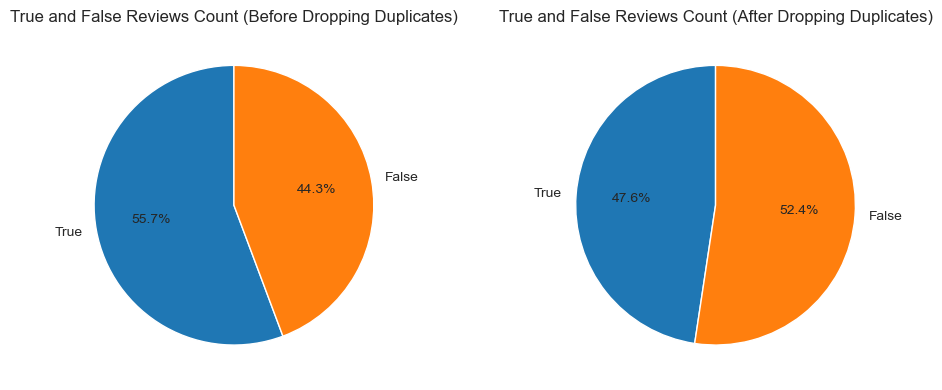

In [13]:
plt.figure(figsize=(10, 4)); 
for i, (df, title) in enumerate(zip([data, review_data], ['Before Dropping Duplicates', 'After Dropping Duplicates'])): 
    plt.subplot(1, 2, i + 1); 
    plt.pie(df['verified_purchase'].value_counts().reindex([True, False]).fillna(0).values, 
            colors=colors, 
            labels=df['verified_purchase'].value_counts().reindex([True, False]).fillna(0).index.astype(str), 
            autopct='%1.1f%%', 
            startangle=90); 
    plt.title(f'True and False Reviews Count ({title})'); 
plt.tight_layout(); plt.show()

> The Verified Purchases (VP) column serves as the target variable, showing a nearly balanced distribution of true (56%) and false (44%) reviews. Amazon's VP feature combats fake reviews by requiring purchase confirmation, enhancing feedback credibility from genuine buyers.

>After removing duplicates, the distribution reflects  of True (47%) and  False (52%) reviews, indicating a slight increase in the number of False values while still maintaining a balanced dataset.



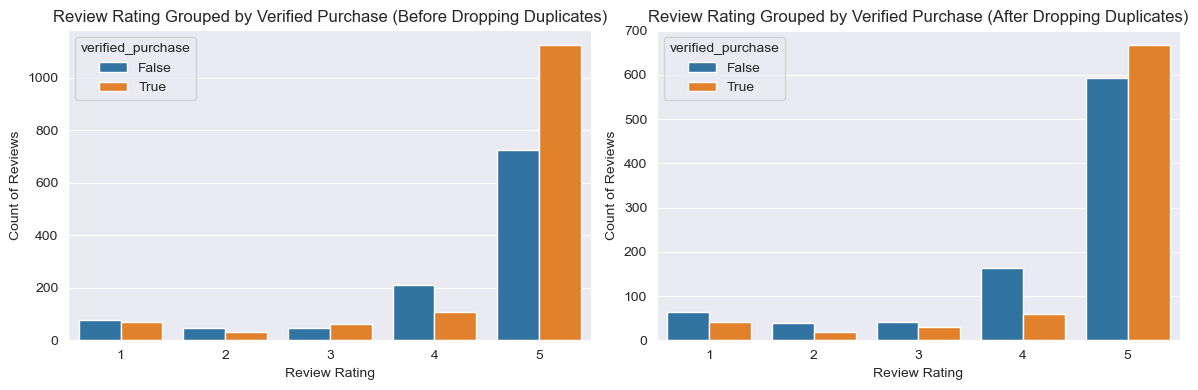

In [14]:
# Set figure size
plt.figure(figsize=(12, 4))

# Loop through datasets and titles
for i, (df, title) in enumerate(zip([data, review_data], ['Before Dropping Duplicates', 'After Dropping Duplicates'])):
    plt.subplot(1, 2, i + 1)  # Create a subplot
    sns.countplot(x='review_rating', hue='verified_purchase', data=df, palette=colors)  # Create the count plot
    plt.xlabel("Review Rating")  # Set x-axis label
    plt.ylabel("Count of Reviews")  # Set y-axis label
    plt.title(f"Review Rating Grouped by Verified Purchase ({title})")  # Set title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

> The analysis reveals that while removing duplicates significantly reduces total review counts, the distribution between true and false reviews remains consistent, with the 5-star rating continuing to dominate.

### REVIEW TEXT EDA

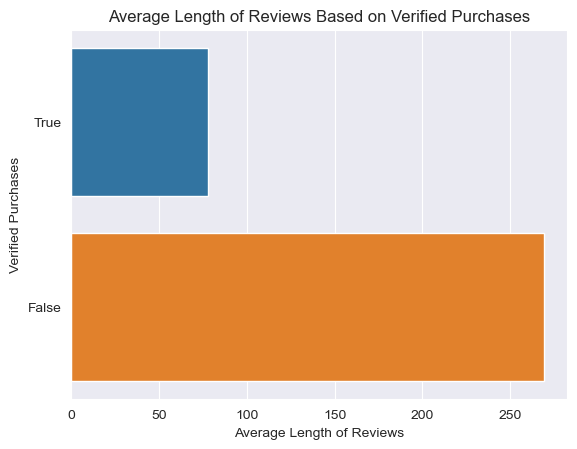

In [15]:
# Select relevant columns
cols = ["verified_purchase", "review_text"]
vprt = review_data[cols]  # Making a subset of the DataFrame

# Filtering based on True and False VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]

# Average review length based on True and False VP
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

# Prepare data for plotting
x = [true_average_length, false_average_length]
y = ["True", "False"]

# Plotting the graph
sns.barplot(x=x, y=y, palette=colors)
plt.xlabel("Average Length of Reviews")
plt.ylabel("Verified Purchases")
plt.title("Average Length of Reviews Based on Verified Purchases")
plt.show()

>The graph reveals that the average length of reviews marked as false (unverified purchases) exceeds that of verified reviews. Specifically, false reviews average over 250 characters, while verified reviews typically range between 50 and 100 characters.

>This finding aligns with observations from platforms specializing in identifying fraudulent reviews, which suggest that fake reviews often have longer lengths compared to legitimate ones. The longer average length of false reviews may indicate an attempt to appear more detailed or convincing, even when the reviewer lacks genuine experience with the product.

## PRE-PROCESSING

Text preprocessing is essential for cleaning text data and making it suitable for model training. Text data often contains noise, such as emotions, punctuation, and varying cases, which complicates analysis. Since machines process numbers rather than words, efficient conversion of text to numerical format is necessary.

## Summary of Noise in Review Text
The summary statistics reveal occurrences of the aforementioned noise within the review text, prompting the need for thorough preprocessing.

> To Do
1. Drop unwanted columns:Eliminate any irrelevant features that do not contribute to the analysis.
2. Lowercasing:Convert all text to lowercase to maintain uniformity and avoid case sensitivity issues.
3. Remove Stopwords:Eliminate common words (e.g., "and," "the") that do not add significant meaning to the reviews.
4. Remove Punctuations and Special charas: Clean the text by removing punctuation marks and special characters to focus on the actual words.
5. Stemming: Reduce words to their base or root form to standardize variations (e.g., "running" to "run").

In [16]:
#DROP UNNECESSARY COLUMNS
review_data.drop(["total words","total characters",
         "total stopwords","total punctuations",
         "total uppercases","review_rating"], axis=1, inplace=True)
review_data.head()

,review_text,verified_purchase
0,"As you get older, you know what you like and w...",True
1,Three gigantic marmite jars that will last pro...,True
2,Excellent,True
3,A great flavour top - up for slow cooking.,True
4,Does what is says it does,False


For now, we are going to be only utlizing review_text and verified_purchase for our classifiers.

In [17]:
#CORRECT SPELLING
review_data.review_text.apply(lambda i: ''.join(TextBlob(i).correct()))

0       Is you get older, you know what you like and w...
1       Three gigantic marie wars that will last proba...
2                                               Excellent
3              A great flavour top - up for slow cooking.
4                               Does what is says it does
5                             Excellent item.Good for men
6                               Thank you ofm very happy
7                                               Beautiful
8                                 Always buy. Fig bottles
9       Always use this product on my heavily mistreat...
10                                            Great value
11      tos not the one in the picture, but gets 5 st...
12      Stem as described, excellent quality, rapid de...
13             Good body wash but not a very strong smell
14                                                  Great
15                                              North it!
16      I remember trying this at a friends house year...
17            

In [18]:
#REMOVING THE STOPWORDS,PUNCTUATIONS, LOWERCASING, AND STEMMING OF THE SENTENCES
def text_preprocessing(text):
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tokens = removed_special_characters.lower().split()
    
    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []
    
    for token in tokens:
        if token not in sw:
            cleaned.append(token)
            
    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)

In [19]:
review_data['review_text'] = review_data['review_text'].apply(text_preprocessing)

In [20]:
review_data['review_text']

0       get older know like suitabl bodi like dove pro...
1       three gigant marmit jar last probabl whole lif...
2                                                   excel
3                             great flavour top slow cook
4                                                     say
5                                     excel item good men
6                                             thank happi
7                                                  beauti
8                                     alway buy big bottl
9       alway use product heavili mistreat hair work w...
10                                             great valu
11      one pictur get star regular one use awesom peo...
12      item describ excel qualiti rapid deliveri grea...
13                            good bodi wash strong smell
14                                                  great
15                                                  worth
16      rememb tri friend hous year ago ive use month ...
17            

In [21]:
#CHECK RARE WORDS
r = pd.Series(' '.join(review_data['review_text']).split()).value_counts()[-10:]
print("RARE WORDS:")
print(r)

RARE WORDS:
accident     1
chuck        1
emigr        1
salt         1
mushroom     1
fli          1
cult         1
revitalis    1
advantag     1
tendon       1
Name: count, dtype: int64


In [22]:
def generate_word_cloud(data, text_column):
     # Initialize an empty string to hold all the words
    words = '' 
    
    # Combine all review texts into one string
    for review in data[text_column]: 
        tokens = review.split()   
        words += " ".join(tokens) + " "
    
    # Generate the word cloud
    word_cloud = WordCloud(width=700, height=700, 
                           background_color='white', 
                           min_font_size=10).generate(words) 
    
    # Display the word cloud
    plt.figure(figsize=(5, 5)) 
    plt.imshow(word_cloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 
    plt.show()


def count_words(data, text_column):
  
    # Count the number of words in each review
    data['word_count'] = data[text_column].apply(lambda x: len(x.split()))
    
    # Return the updated DataFrame with word counts
    return data[[text_column, 'word_count']]


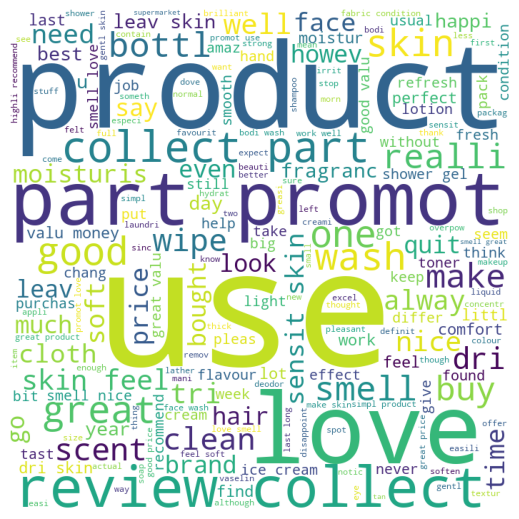

                                            review_text  word_count
0     get older know like suitabl bodi like dove pro...          19
1     three gigant marmit jar last probabl whole lif...          19
2                                                 excel           1
3                           great flavour top slow cook           5
4                                                   say           1
5                                   excel item good men           4
6                                           thank happi           2
7                                                beauti           1
8                                   alway buy big bottl           4
9     alway use product heavili mistreat hair work w...          10
10                                           great valu           2
11    one pictur get star regular one use awesom peo...          11
12    item describ excel qualiti rapid deliveri grea...          11
13                          good bodi wash stron

In [23]:
generate_word_cloud(review_data, "review_text")
# Usage example:
word_count_df = count_words(review_data, "review_text")
print(word_count_df)

In [24]:
#removing common and rare words
common = pd.Series(' '.join(review_data['review_text']).split()).value_counts()[:3]
common = list(common.index)
review_data['review_text'] = review_data['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(review_data['review_text']).split()).value_counts()[-3:]
rare = list(rare.index)
review_data['review_text'] = review_data['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))

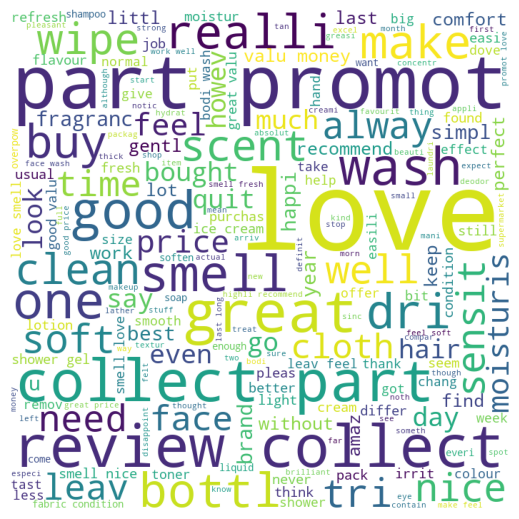

                                            review_text  word_count
0     get older know like suitabl bodi like dove giv...          17
1     three gigant marmit jar last probabl whole lif...          19
2                                                 excel           1
3                           great flavour top slow cook           5
4                                                   say           1
5                                   excel item good men           4
6                                           thank happi           2
7                                                beauti           1
8                                   alway buy big bottl           4
9     alway heavili mistreat hair work wonder time time           8
10                                           great valu           2
11     one pictur get star regular one awesom peopl dri           9
12    item describ excel qualiti rapid deliveri grea...          10
13                          good bodi wash stron

In [25]:
generate_word_cloud(review_data, "review_text")
# Usage example:
word_count_df = count_words(review_data, "review_text")
print(word_count_df)

>After removing the three most common words, the remaining top ten words show that the reviews are mostly positive. This suggests that people are generally happy with the product. However, the lack of negative reviews could make it tricky to tell if a review is fake or real, which is a limitation of this study.

>After analyzing the review data, we found that the most common words used in the reviews tend to be positive, indicating that customers generally have a good experience with the products.

1. Common Words: We removed some of the most frequent words that didn't add much meaning to the reviews. After doing this, we identified the top 10 words that reflect customer sentiment.

2. Positive Sentiment: The overall tone of the reviews is positive, which is a good sign for the products being analyzed.

3. Limitation: It’s important to note that our dataset lacks negative reviews. This could lead to challenges when trying to determine whether a review is "fake" or "real" based solely on the sentiment, as we don't have enough examples of negative feedback to compare agains

In [26]:
review_data['review_text'].apply(word_tokenize).head()

0    [get, older, know, like, suitabl, bodi, like, ...
1    [three, gigant, marmit, jar, last, probabl, wh...
2                                              [excel]
3                    [great, flavour, top, slow, cook]
4                                                [say]
Name: review_text, dtype: object

In [27]:

#SAVING UPDATED DATAFRAME AS .csv FILE
review_data.to_csv('C:/Data_Science/Mini Project/Capston Project/Capston_IOD_Project/data and pickle files/cleaned_data.csv')